Data sin limpieza: (891, 12)
Valores vacios en la data:
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Valores vacios en la data despues de la limpeza:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
normalizacion de la data


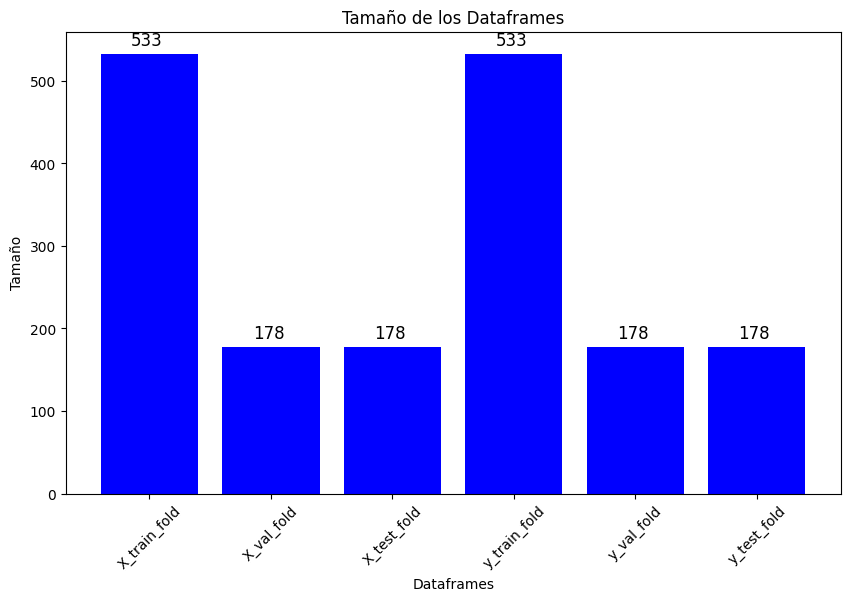


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
569     1.0  1.0  0.396833    0.0    0.0  0.015330       1.0
786     1.0  0.0  0.220910    0.0    0.0  0.014631       1.0
75      1.0  1.0  0.308872    0.0    0.0  0.014932       1.0
114     1.0  0.0  0.208344    0.0    0.0  0.028221       0.0
597     1.0  1.0  0.610455    0.0    0.0  0.000000       1.0

Variables x para validacion:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
266     1.0  1.0  0.195778  0.500  0.166667  0.077465       1.0
240     1.0  0.0  0.346569  0.125  0.000000  0.028213       0.0
356     0.0  0.0  0.271174  0.000  0.166667  0.107353       1.0
200     1.0  1.0  0.346569  0.000  0.000000  0.018543       1.0
466     0.5  1.0  0.346569  0.000  0.000000  0.000000       1.0

Variables x para prueba:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
830     1.0  0.0  0.183212  0.125  0.000000  0.028213       0.0
734     0.5  1.0  0.283740  0.000

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
MSE: 0.2256
Bias: 0.2255
Variance: 0.0001


In [23]:
#importar librerias necesarias
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import random
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.evaluate import bias_variance_decomp

def plot_dataframe_sizes(X_train_fold, X_val_fold, X_test_fold, y_train_fold, y_val_fold, y_test_fold):
  # Tamaños de los dataframes
  sizes = [
    X_train_fold.shape[0],
    X_val_fold.shape[0],
    X_test_fold.shape[0],
    y_train_fold.shape[0],
    y_val_fold.shape[0],
    y_test_fold.shape[0]
  ]
  # Etiquetas para los dataframes
  labels = [
    'X_train_fold',
    'X_val_fold',
    'X_test_fold',
    'y_train_fold',
    'y_val_fold',
    'y_test_fold'
  ]
  # Crear un gráfico de barras
  plt.figure(figsize=(10, 6))
  bars = plt.bar(labels, sizes, color='blue')
  plt.xlabel('Dataframes')
  plt.ylabel('Tamaño')
  plt.title('Tamaño de los Dataframes')
  plt.xticks(rotation=45)

  # Agregar etiquetas con los tamaños dentro de cada barra
  for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, size + 10, str(size), fontsize=12, color='black')

  # Mostrar el gráfico
  plt.show()

#leer la data
df=pd.read_csv("titanic.csv")
#mostrar la forma de los datos originales
print("Data sin limpieza:", df.shape)
#eliminar columnas que no son importantes para el analisis
df.drop(["PassengerId", "Name","Ticket","Cabin"], axis=1, inplace=True)
#encontrar los valores vacios
print("Valores vacios en la data:\n",df.isnull().sum())
#rellenar los valores vacios en la columna Age con la mediana de los datos
mage = df['Age'].median()
df['Age'].fillna(mage, inplace=True)
#eliminar el resto de valores vacios pues son pocos
df.dropna(inplace=True)
print("Valores vacios en la data despues de la limpeza:\n",df.isnull().sum())
#utilizar labelencoder para reemplazar los valores categoricos por numericos asignado valores apartir de 1 dependiendo de los valores unicos presentes
# en cada calumna
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
#dado que el modelo que deseamos uitlizar se ve altamente afectado por las grandes diferencias numericas que existen en nuestros datos
#utilizaremos MinMaxscaler para realizar una transformacion en los datos
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
print("normalizacion de la data")
#finalmente reacomodaremos los datos
df=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked','Survived']]

#con ayuda de las funciones de sklearn hacemos la division de la data en 3 conjuntos, uno de entrenmiento con el 60% de los datos,
#uno de validacion y test con el 20% de los datos respectivamente
X = df.drop('Survived', axis=1)
y = df['Survived']
# Dividir los datos en tres conjuntos: entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
plot_dataframe_sizes(X_train, X_val, X_test, y_train, y_val, y_test)
print("\nVariables x para entrenamiento:")
print(X_train.head())
print("\nVariables x para validacion:")
print(X_val.head())
print("\nVariables x para prueba:")
print(X_test.head())
print("\nVariable y para entrenamiento:")
print(y_train.head())
print("\nVariable y para validacion:")
print(y_val.head())
print("\nVariable y para prueba:")
print(y_test.head())

#generación del modelo
model = Sequential()
#agregamos 3 capas ocultas la primera de 64 nueronas, la segunda de 32 y la ultima de 16,
#emulando la arquitectura de una red Neuronal Feedforward pues podemos jugar con su configuracion
#facimente mas adelante, ademas por su alto rendimiento sera efectiva para nuestra gran cantidad de datos
#entodas utilizamos la funcion de activacion relu pues es la mas convencional

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#capa de salida (1 neurona para la clasificación binaria, es por ello que la funcion es sigmoide)
model.add(Dense(1, activation='sigmoid'))
#compilación del modelo, se utilizo binary_crossentropy pues es la mas adecuada en problemas de clasificacion
#binaria, un optimizador de adam pues es de los mas comunes y eficientes y de metrica accuracy pues se pueden
#obtener las demas con la funcion reporte
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#entrenamiento del modelo con 50 epocas para tener una cantidad considerable y revisar si eran suficientes o
#demaciadas, un batch size de 32 dada la forma del data set pues es una catidad considerable de datos
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
#evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')



#realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5)  # Convertir a etiquetas binarias (0 o 1)
#obtener el informe de clasificación
class_report_test = classification_report(y_test, y_test_pred_binary)

#mostrar el informe de clasificación
print("\nInforme de Clasificación para el conjunto de prueba:")
print(class_report_test)

#realizar predicciones en el conjunto de validacion
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5)  # Convertir a etiquetas binarias (0 o 1)
#obtener el informe de clasificación
class_report_test = classification_report(y_val, y_val_pred_binary)

#mostrar el informe de clasificación
print("Informe de Clasificación para el conjunto de validacion:")
print(class_report_test)

mse, bias, var = bias_variance_decomp(model, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1, verbose=0)
# Bias + Variance = MSE
print('MSE: %.4f' % mse)
print('Bias: %.4f' % bias)
print('Variance: %.4f' % var)


In [24]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
import matplotlib.pyplot as plt



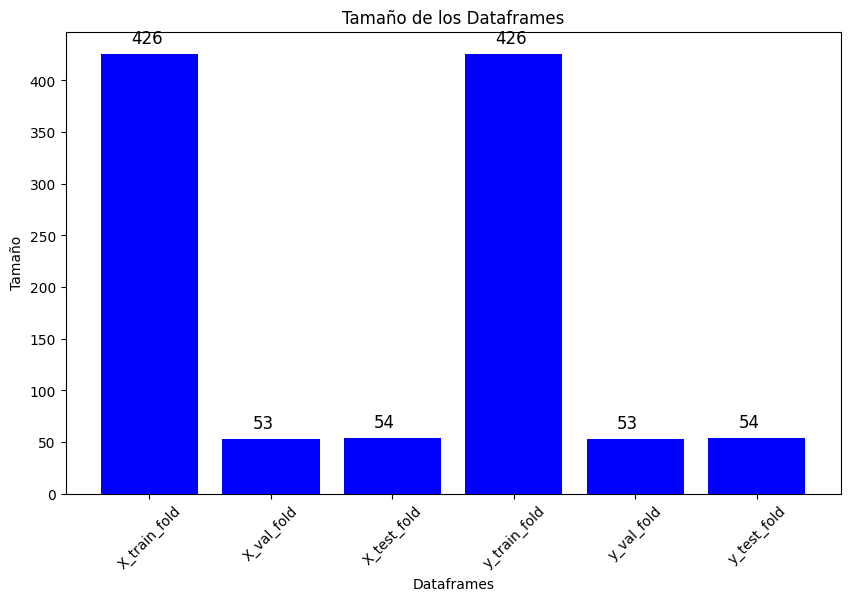


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
786     1.0  0.0  0.220910    0.0  0.000000  0.014631       1.0
75      1.0  1.0  0.308872    0.0  0.000000  0.014932       1.0
114     1.0  0.0  0.208344    0.0  0.000000  0.028221       0.0
533     1.0  0.0  0.346569    0.0  0.333333  0.043640       0.0
105     1.0  1.0  0.346569    0.0  0.000000  0.015412       1.0

Variables x para validacion:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
440     0.5  0.0  0.560191  0.125  0.166667  0.051237       1.0
578     1.0  0.0  0.346569  0.125  0.000000  0.028221       0.0
163     1.0  1.0  0.208344  0.000  0.000000  0.016908       1.0
550     0.0  1.0  0.208344  0.000  0.333333  0.216430       0.0
848     0.5  1.0  0.346569  0.000  0.166667  0.064412       1.0

Variables x para prueba:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
294     1.0  1.0  0.296306    0.0    0.0  0.015412       1.0
776     1.0  1.0  0.3

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 7ms/step


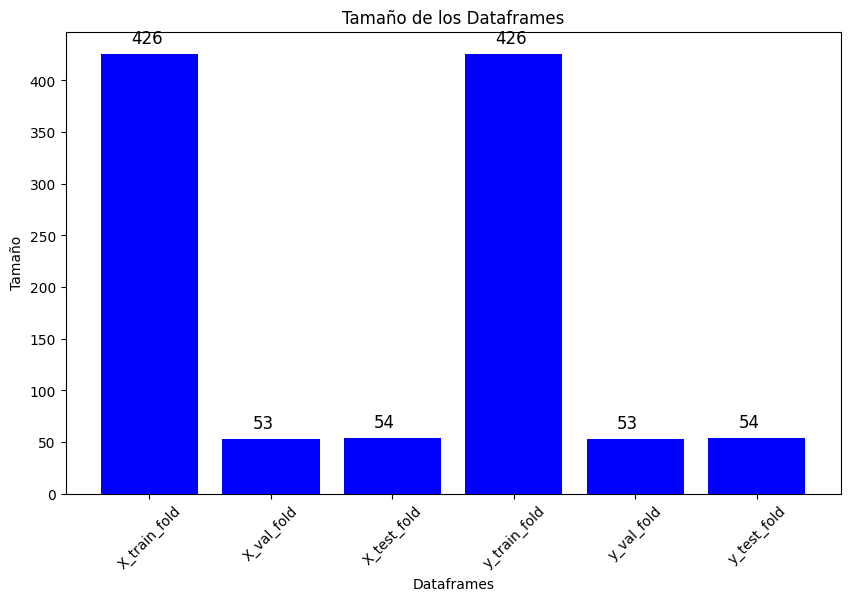


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
569     1.0  1.0  0.396833    0.0    0.0  0.015330       1.0
786     1.0  0.0  0.220910    0.0    0.0  0.014631       1.0
75      1.0  1.0  0.308872    0.0    0.0  0.014932       1.0
114     1.0  0.0  0.208344    0.0    0.0  0.028221       0.0
597     1.0  1.0  0.610455    0.0    0.0  0.000000       1.0

Variables x para validacion:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
863     1.0  0.0  0.346569  1.000  0.333333  0.135753       1.0
645     0.0  1.0  0.597889  0.125  0.000000  0.149765       0.0
643     1.0  1.0  0.346569  0.000  0.000000  0.110272       1.0
595     1.0  1.0  0.447097  0.125  0.166667  0.047138       1.0
191     0.5  1.0  0.233476  0.000  0.000000  0.025374       1.0

Variables x para prueba:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
416     0.5  0.0  0.421965  0.125  0.166667  0.063436       1.0
198     1.0  0.0  0.346569  0.000

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 8ms/step


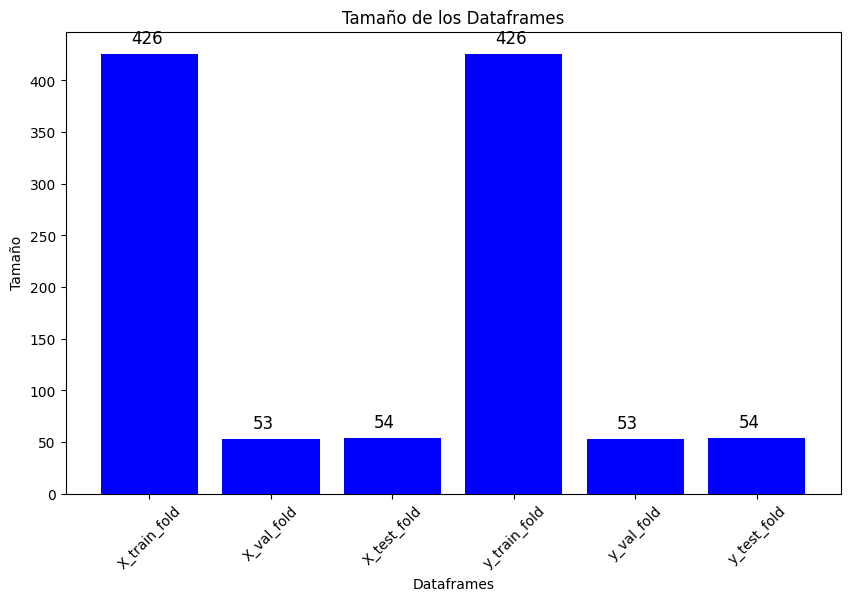


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
569     1.0  1.0  0.396833    0.0  0.000000  0.015330       1.0
786     1.0  0.0  0.220910    0.0  0.000000  0.014631       1.0
597     1.0  1.0  0.610455    0.0  0.000000  0.000000       1.0
533     1.0  0.0  0.346569    0.0  0.333333  0.043640       0.0
368     1.0  0.0  0.346569    0.0  0.000000  0.015127       0.5

Variables x para validacion:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
727     1.0  0.0  0.346569    0.0  0.000000  0.015103       0.5
846     1.0  1.0  0.346569    1.0  0.333333  0.135753       1.0
793     0.0  1.0  0.346569    0.0  0.000000  0.059914       0.0
257     0.0  0.0  0.371701    0.0  0.000000  0.168837       1.0
596     0.5  0.0  0.346569    0.0  0.000000  0.064412       1.0

Variables x para prueba:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
96      0.0  1.0  0.886906  0.000  0.000000  0.067640       0.0
472     0.5  0.

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 9ms/step


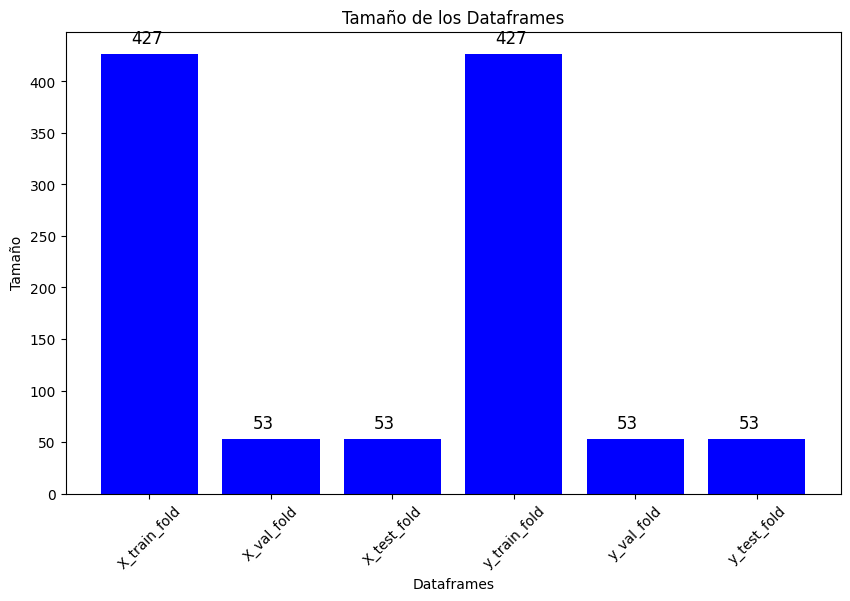


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
569     1.0  1.0  0.396833    0.0  0.000000  0.015330       1.0
75      1.0  1.0  0.308872    0.0  0.000000  0.014932       1.0
114     1.0  0.0  0.208344    0.0  0.000000  0.028221       0.0
597     1.0  1.0  0.610455    0.0  0.000000  0.000000       1.0
533     1.0  0.0  0.346569    0.0  0.333333  0.043640       0.0

Variables x para validacion:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
125     1.0  1.0  0.145514  0.125    0.0  0.021942       0.0
703     1.0  1.0  0.308872  0.000    0.0  0.015111       0.5
460     0.0  1.0  0.597889  0.000    0.0  0.051822       1.0
263     0.0  1.0  0.497361  0.000    0.0  0.000000       1.0
280     1.0  1.0  0.811510  0.000    0.0  0.015127       0.5

Variables x para prueba:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
278     1.0  1.0  0.082684  0.500  0.166667  0.056848       0.5
340     0.5  1.0  0.019854  0.125

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 7ms/step


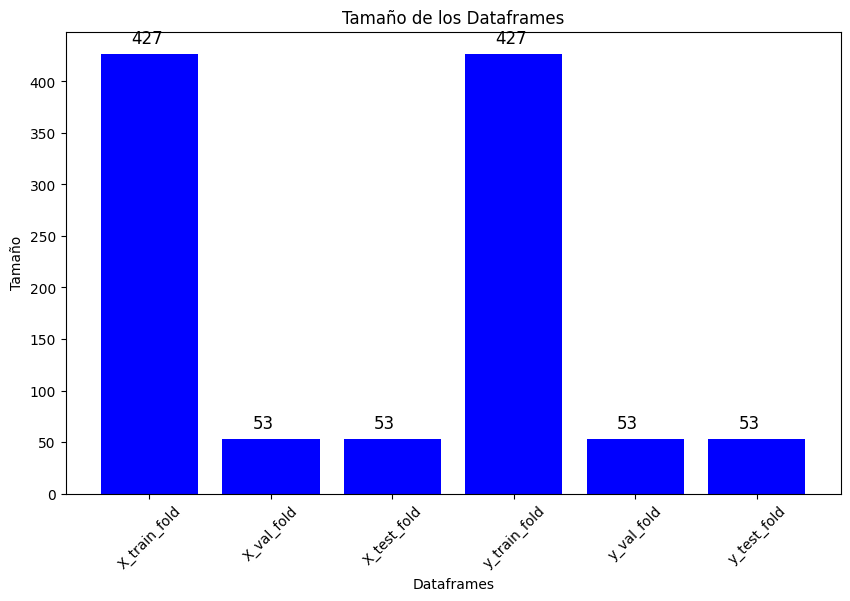


Variables x para entrenamiento:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
569     1.0  1.0  0.396833    0.0    0.0  0.015330       1.0
786     1.0  0.0  0.220910    0.0    0.0  0.014631       1.0
75      1.0  1.0  0.308872    0.0    0.0  0.014932       1.0
114     1.0  0.0  0.208344    0.0    0.0  0.028221       0.0
597     1.0  1.0  0.610455    0.0    0.0  0.000000       1.0

Variables x para validacion:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
188     1.0  1.0  0.497361  0.125  0.166667  0.030254       0.5
112     1.0  1.0  0.271174  0.000  0.000000  0.015713       1.0
355     1.0  1.0  0.346569  0.000  0.000000  0.018543       1.0
341     0.0  0.0  0.296306  0.375  0.333333  0.513342       1.0
453     0.0  1.0  0.610455  0.125  0.000000  0.173920       0.0

Variables x para prueba:
     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
241     1.0  0.0  0.346569  0.125  0.000000  0.030254       0.5
296     1.0  1.0  0.290023  0.000

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 9ms/step
Sesgo promedio conjunto de validacion: 0.21953535757741888
Varianza promedio conjunto de validacion: 9.943672185587081e-05
Sesgo promedio conjunto de prueba: 0.23946126599962506
Varianza promedio conjunto de prueba: 6.469703712351735e-06
Accuracy media de Validación Cruzada conjunto de validacion : 0.8
Precisión media de Validación Cruzada conjunto de validacion: 0.8100925218572277
Recall medio de Validación Cruzada conjunto de validacion: 0.6469567859041544
F1-score medio de Validación Cruzada conjunto de validacion: 0.7042694342694343
Accuracy media de Validación Cruzada conjunto de prueba: 0.8209643605870021
Precisión media de Validación Cruzada conjunto de prueba: 0.8431349206349207
Recall medio de Validación Cruzada conjunto de prueba: 0.6307936507936509
F1-score medio de Validación Cruzada conjunto de prueba: 0.7110502316990714


In [25]:
# Dividir los datos en 5 folds estratificados
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Listas para almacenar las puntuaciones de validación cruzada
cv_scores = []

# Listas para almacenar las métricas de validación cruzada para validacion
cv_accuracy_scores = []
cv_precision_scores = []
cv_recall_scores = []
cv_f1_scores = []

# Listas para almacenar las métricas de validación cruzada para test
cv_accuracy_scores_test = []
cv_precision_scores_test = []
cv_recall_scores_test = []
cv_f1_scores_test = []

# Listas para almacenar las estimaciones de sesgo y varianza en cada fold
bias_list = []
variance_list = []
bias_list2 = []
variance_list2 = []
# Iterar a través de los folds
for train_idx, val_idx in kf.split(X_train, y_train):
  X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
  y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
  X_val_fold, X_test_fold, y_val_fold, y_test_fold = train_test_split(X_val_fold, y_val_fold, test_size=0.5)
  plot_dataframe_sizes(X_train_fold, X_val_fold, X_test_fold, y_train_fold, y_val_fold, y_test_fold)


  print("\nVariables x para entrenamiento:")
  print(X_train_fold.head())
  print("\nVariables x para validacion:")
  print(X_val_fold.head())
  print("\nVariables x para prueba:")
  print(X_test_fold.head())
  print("\nVariable y para entrenamiento:")
  print(y_train_fold.head())
  print("\nVariable y para validacion:")
  print(y_val_fold.head())
  print("\nVariable y para prueba:")
  print(y_test_fold.head())


  print(y_train_fold.shape)
  print(X_val_fold.shape)
  print(X_test_fold.shape)
  print(y_val_fold.shape)
  print(y_test_fold.shape)

  # Crear un nuevo modelo para cada fold
  model = create_model()

  # Entrenar el modelo en el fold de entrenamiento
  model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

  # Realizar predicciones en el fold de validación
  y_val_pred = model.predict(X_val_fold)
  y_val_pred_binary = (y_val_pred > 0.5)

  # Calcular las métricas en el fold de validación
  accuracy = accuracy_score( y_val_fold, y_val_pred_binary)
  precision = precision_score(y_val_fold, y_val_pred_binary)
  recall = recall_score(y_val_fold, y_val_pred_binary)
  f1 = f1_score(y_val_fold, y_val_pred_binary)

  # Almacenar las métricas en las listas
  cv_accuracy_scores.append(accuracy)
  cv_precision_scores.append(precision)
  cv_recall_scores.append(recall)
  cv_f1_scores.append(f1)

  # Realizar predicciones en el fold de test
  y_test_pred = model.predict(X_test_fold)
  y_test_pred_binary = (y_test_pred > 0.5)

  # Calcular las métricas en el fold de test
  accuracy = accuracy_score(y_test_fold, y_test_pred_binary)
  precision = precision_score(y_test_fold, y_test_pred_binary)
  recall = recall_score(y_test_fold, y_test_pred_binary)
  f1 = f1_score(y_test_fold, y_test_pred_binary)

  # Almacenar las métricas en las listas
  cv_accuracy_scores_test.append(accuracy)
  cv_precision_scores_test.append(precision)
  cv_recall_scores_test.append(recall)
  cv_f1_scores_test.append(f1)
  # Calcula las estimaciones de sesgo y varianza en el fold de validación
  mse, bias, var = bias_variance_decomp(model, X_train_fold.values, y_train_fold.values,
  X_val_fold.values, y_val_fold.values, loss='mse', num_rounds=200, random_seed=1, verbose=0)
  # Almacena las estimaciones en las listas
  bias_list.append(bias)
  variance_list.append(var)
    # Calcula las estimaciones de sesgo y varianza en el fold de validación
  mse, bias2, var2 = bias_variance_decomp(model, X_val_fold.values, y_val_fold.values,
  X_val_fold.values, y_val_fold.values, loss='mse', num_rounds=200, random_seed=1, verbose=0)
  # Almacena las estimaciones en las listas
  bias_list2.append(bias2)
  variance_list2.append(var2)


# Calcula el sesgo y la varianza promedio en todos los folds
average_bias = np.mean(bias_list)
average_variance = np.mean(variance_list)

print("Sesgo promedio conjunto de validacion:", average_bias)
print("Varianza promedio conjunto de validacion:", average_variance)

average_bias2 = np.mean(bias_list2)
average_variance2 = np.mean(variance_list2)

print("Sesgo promedio conjunto de prueba:", average_bias2)
print("Varianza promedio conjunto de prueba:", average_variance2)


# Imprimir las métricas de validación cruzada
print("Accuracy media de Validación Cruzada conjunto de validacion :", np.mean(cv_accuracy_scores))
print("Precisión media de Validación Cruzada conjunto de validacion:", np.mean(cv_precision_scores))
print("Recall medio de Validación Cruzada conjunto de validacion:", np.mean(cv_recall_scores))
print("F1-score medio de Validación Cruzada conjunto de validacion:", np.mean(cv_f1_scores))

# Imprimir las métricas de validación cruzada
print("Accuracy media de Validación Cruzada conjunto de prueba:", np.mean(cv_accuracy_scores_test))
print("Precisión media de Validación Cruzada conjunto de prueba:", np.mean(cv_precision_scores_test))
print("Recall medio de Validación Cruzada conjunto de prueba:", np.mean(cv_recall_scores_test))
print("F1-score medio de Validación Cruzada conjunto de prueba:", np.mean(cv_f1_scores_test))


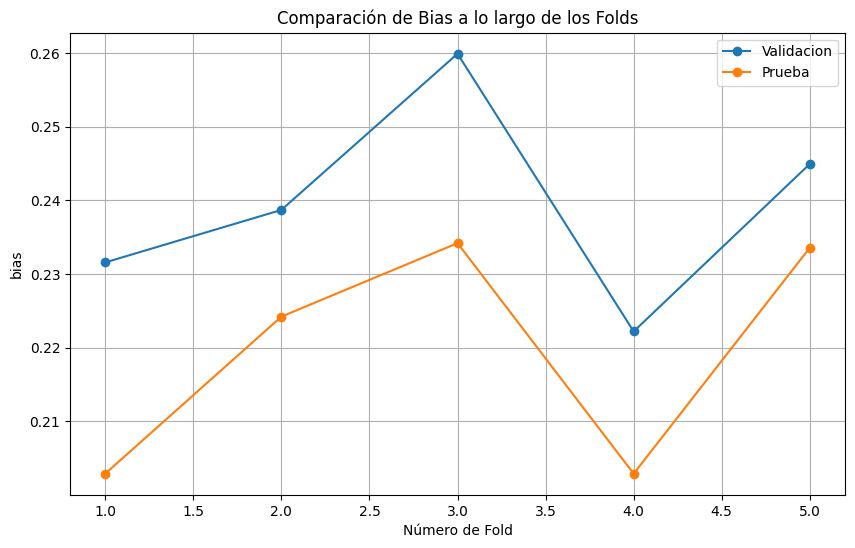

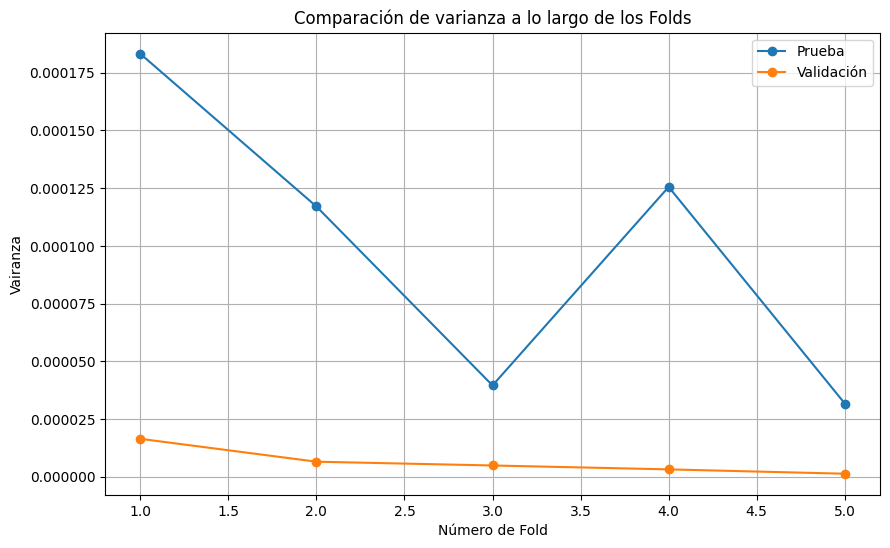

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Listas de bias
bias = np.array(bias_list)
bias2 = np.array(bias_list2)
# Crear un arreglo con el número de folds
num_folds = np.arange(1, len(bias) + 1)

# Crear un gráfico de línea para el bias a lo largo de los folds
plt.figure(figsize=(10, 6))
plt.plot(num_folds, bias2, marker='o', label="Validacion")
plt.plot(num_folds, bias, marker='o',label="Prueba")
plt.xlabel('Número de Fold')
plt.ylabel('bias')
plt.title('Comparación de Bias a lo largo de los Folds')
plt.legend()
plt.grid(True)
plt.show()

# Listas de varianza
var = np.array(variance_list)
var2 = np.array(variance_list2)
# Crear un arreglo con el número de folds
num_folds = np.arange(1, len(var) + 1)
# Crear un gráfico de línea para la varianza a lo largo de los folds
plt.figure(figsize=(10, 6))
plt.plot(num_folds, var, marker='o', label='Prueba')
plt.plot(num_folds, var2, marker='o', label='Validación')
plt.xlabel('Número de Fold')
plt.ylabel('Vairanza')
plt.title('Comparación de varianza a lo largo de los Folds')
plt.legend()
plt.grid(True)
plt.show()



In [27]:
# Listas para almacenar las métricas de validación cruzada para validacion
print("Valores de acurracy en la validacion cruzada del conjunto de validacion",cv_accuracy_scores)
print("Valores de presicion en la validacion cruzada del conjunto de validacion",cv_precision_scores)
print("Valores de recall en la validacion cruzada del conjunto de validacion",cv_recall_scores)
print("Valores de F1 score en la validacion cruzada del conjunto de validacion",cv_f1_scores)

# Listas para almacenar las métricas de validación cruzada para test
print("Valores de acurracy en la validacion cruzada del conjunto de prueba",cv_accuracy_scores_test)
print("Valores de presicion en la validacion cruzada del conjunto de prueba",cv_precision_scores_test)
print("Valores de recall en la validacion cruzada del conjunto de prueba",cv_recall_scores_test)
print("Valores de F1 score en la validacion cruzada del conjuntode prueba",cv_f1_scores_test)
# Calcular desviación estándar para cada métrica
std_accuracy = np.std(cv_accuracy_scores)
std_precision = np.std(cv_precision_scores)
std_recall = np.std(cv_recall_scores)
std_f1 = np.std(cv_f1_scores)

std_accuracy_test = np.std(cv_accuracy_scores_test)
std_precision_test = np.std(cv_precision_scores_test)
std_recall_test = np.std(cv_recall_scores_test)
std_f1_test = np.std(cv_f1_scores_test)

# Imprimir desviaciones estándar
print("Desviación Estándar de Precisión (Accuracy) en Validación:", std_accuracy)
print("Desviación Estándar de Precisión (Accuracy) en Prueba:", std_accuracy_test)

print("Desviación Estándar de Precisión (Precision) en Validación:", std_precision)
print("Desviación Estándar de Precisión (Precision) en Prueba:", std_precision_test)

print("Desviación Estándar de Precisión (Recall) en Validación:", std_recall)
print("Desviación Estándar de Precisión (Recall) en Prueba:", std_recall_test)

print("Desviación Estándar de Precisión (F1-score) en Validación:", std_f1)
print("Desviación Estándar de Precisión (F1-score) en Prueba:", std_f1_test)

Valores de acurracy en la validacion cruzada del conjunto de validacion [0.7358490566037735, 0.8301886792452831, 0.8113207547169812, 0.7924528301886793, 0.8301886792452831]
Valores de presicion en la validacion cruzada del conjunto de validacion [0.6363636363636364, 0.8823529411764706, 0.7142857142857143, 0.8888888888888888, 0.9285714285714286]
Valores de recall en la validacion cruzada del conjunto de validacion [0.7, 0.6818181818181818, 0.7894736842105263, 0.4444444444444444, 0.6190476190476191]
Valores de F1 score en la validacion cruzada del conjunto de validacion [0.6666666666666666, 0.7692307692307693, 0.7500000000000001, 0.5925925925925926, 0.742857142857143]
Valores de acurracy en la validacion cruzada del conjunto de prueba [0.7592592592592593, 0.8518518518518519, 0.8333333333333334, 0.8867924528301887, 0.7735849056603774]
Valores de presicion en la validacion cruzada del conjunto de prueba [0.8888888888888888, 0.8125, 0.8, 1.0, 0.7142857142857143]
Valores de recall en la vali

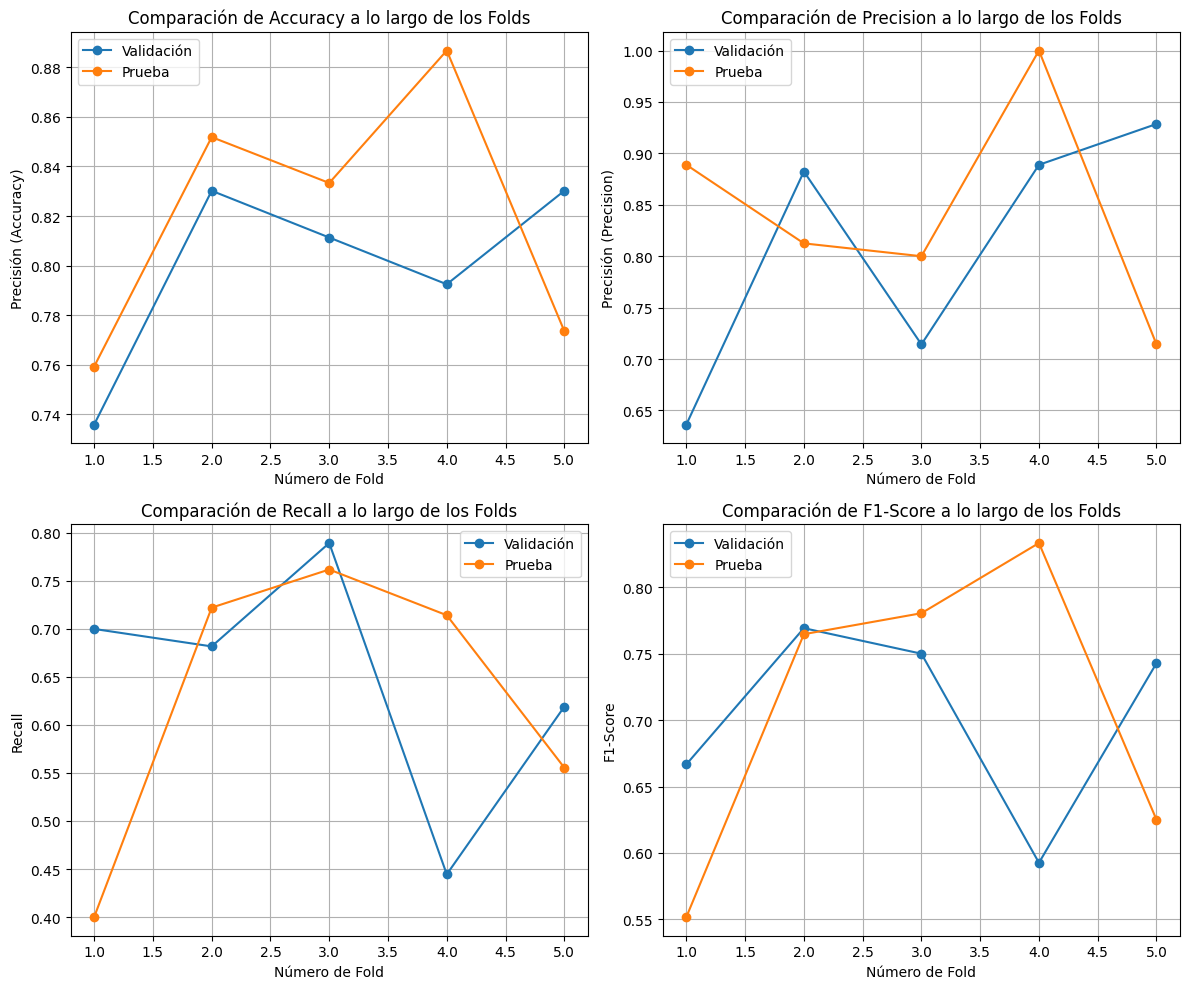

In [28]:
 import matplotlib.pyplot as plt
import numpy as np

# Listas de métricas para validación y prueba
val_accuracy_scores = np.array(cv_accuracy_scores)
test_accuracy_scores = np.array(cv_accuracy_scores_test)
val_precision_scores = np.array(cv_precision_scores)
test_precision_scores = np.array(cv_precision_scores_test)
val_recall_scores = np.array(cv_recall_scores)
test_recall_scores = np.array(cv_recall_scores_test)
val_f1_scores = np.array(cv_f1_scores)
test_f1_scores = np.array(cv_f1_scores_test)

# Crear un arreglo con el número de folds
num_folds = np.arange(1, len(val_accuracy_scores) + 1)

# Crear una figura con 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1 - Accuracy
axes[0, 0].plot(num_folds, val_accuracy_scores, marker='o', label='Validación')
axes[0, 0].plot(num_folds, test_accuracy_scores, marker='o', label='Prueba')
axes[0, 0].set_xlabel('Número de Fold')
axes[0, 0].set_ylabel('Precisión (Accuracy)')
axes[0, 0].set_title('Comparación de Accuracy a lo largo de los Folds')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Subplot 2 - Precision
axes[0, 1].plot(num_folds, val_precision_scores, marker='o', label='Validación')
axes[0, 1].plot(num_folds, test_precision_scores, marker='o', label='Prueba')
axes[0, 1].set_xlabel('Número de Fold')
axes[0, 1].set_ylabel('Precisión (Precision)')
axes[0, 1].set_title('Comparación de Precision a lo largo de los Folds')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Subplot 3 - Recall
axes[1, 0].plot(num_folds, val_recall_scores, marker='o', label='Validación')
axes[1, 0].plot(num_folds, test_recall_scores, marker='o', label='Prueba')
axes[1, 0].set_xlabel('Número de Fold')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Comparación de Recall a lo largo de los Folds')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Subplot 4 - F1-score
axes[1, 1].plot(num_folds, val_f1_scores, marker='o', label='Validación')
axes[1, 1].plot(num_folds, test_f1_scores, marker='o', label='Prueba')
axes[1, 1].set_xlabel('Número de Fold')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_title('Comparación de F1-Score a lo largo de los Folds')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


# cambio de hiperparametros

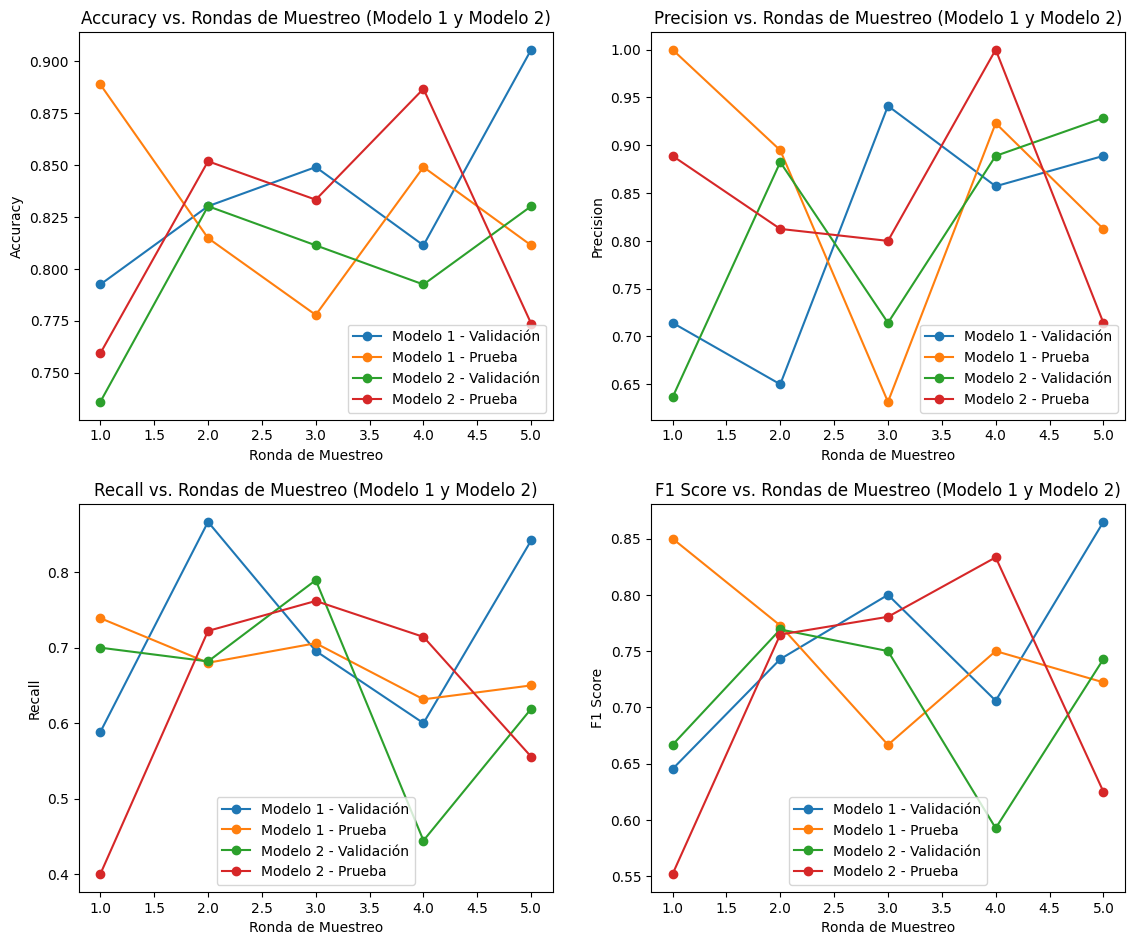

In [46]:

import matplotlib.pyplot as plt
import numpy as np

# Métricas del Modelo 1
accuracy_val_model1 = [0.7924528301886793, 0.8301886792452831, 0.8490566037735849, 0.8113207547169812, 0.9056603773584906]
precision_val_model1 = [0.7142857142857143, 0.65, 0.9411764705882353, 0.8571428571428571, 0.8888888888888888]
recall_val_model1 = [0.5882352941176471, 0.8666666666666667, 0.6956521739130435, 0.6, 0.8421052631578947]
f1_val_model1 = [0.6451612903225806, 0.7428571428571429, 0.7999999999999999, 0.7058823529411764, 0.8648648648648649]

accuracy_test_model1 = [0.8888888888888888, 0.8148148148148148, 0.7777777777777778, 0.8490566037735849, 0.8113207547169812]
precision_test_model1 = [1.0, 0.8947368421052632, 0.631578947368421, 0.9230769230769231, 0.8125]
recall_test_model1 = [0.7391304347826086, 0.68, 0.7058823529411765, 0.631578947368421, 0.65]
f1_test_model1 = [0.85, 0.7727272727272727, 0.6666666666666667, 0.7499999999999999, 0.7222222222222223]

# Métricas del Modelo 2
accuracy_val_model2 = [0.7358490566037735, 0.8301886792452831, 0.8113207547169812, 0.7924528301886793, 0.8301886792452831]
precision_val_model2 = [0.6363636363636364, 0.8823529411764706, 0.7142857142857143, 0.8888888888888888, 0.9285714285714286]
recall_val_model2 = [0.7, 0.6818181818181818, 0.7894736842105263, 0.4444444444444444, 0.6190476190476191]
f1_val_model2 = [0.6666666666666666, 0.7692307692307693, 0.7500000000000001, 0.5925925925925926, 0.742857142857143]

accuracy_test_model2 = [0.7592592592592593, 0.8518518518518519, 0.8333333333333334, 0.8867924528301887, 0.7735849056603774]
precision_test_model2 = [0.8888888888888888, 0.8125, 0.8, 1.0, 0.7142857142857143]
recall_test_model2 = [0.4, 0.7222222222222222, 0.7619047619047619, 0.7142857142857143, 0.5555555555555556]
f1_test_model2 = [0.5517241379310346, 0.7647058823529411, 0.7804878048780488, 0.8333333333333333, 0.6250000000000001]

# Número de rondas de muestreo
rounds = np.arange(1, 6)

# Crear subplots para las 4 métricas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

# Métrica 1: Accuracy
axes[0, 0].plot(rounds, accuracy_val_model1, marker='o', label='Modelo 1 - Validación')
axes[0, 0].plot(rounds, accuracy_test_model1, marker='o', label='Modelo 1 - Prueba')
axes[0, 0].plot(rounds, accuracy_val_model2, marker='o', label='Modelo 2 - Validación')
axes[0, 0].plot(rounds, accuracy_test_model2, marker='o', label='Modelo 2 - Prueba')
axes[0, 0].set_xlabel('Ronda de Muestreo')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy vs. Rondas de Muestreo (Modelo 1 y Modelo 2)')
axes[0, 0].legend()

# Métrica 2: Precision
axes[0, 1].plot(rounds, precision_val_model1, marker='o', label='Modelo 1 - Validación')
axes[0, 1].plot(rounds, precision_test_model1, marker='o', label='Modelo 1 - Prueba')
axes[0, 1].plot(rounds, precision_val_model2, marker='o', label='Modelo 2 - Validación')
axes[0, 1].plot(rounds, precision_test_model2, marker='o', label='Modelo 2 - Prueba')
axes[0, 1].set_xlabel('Ronda de Muestreo')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision vs. Rondas de Muestreo (Modelo 1 y Modelo 2)')
axes[0, 1].legend()

# Métrica 3: Recall
axes[1, 0].plot(rounds, recall_val_model1, marker='o', label='Modelo 1 - Validación')
axes[1, 0].plot(rounds, recall_test_model1, marker='o', label='Modelo 1 - Prueba')
axes[1, 0].plot(rounds, recall_val_model2, marker='o', label='Modelo 2 - Validación')
axes[1, 0].plot(rounds, recall_test_model2, marker='o', label='Modelo 2 - Prueba')
axes[1, 0].set_xlabel('Ronda de Muestreo')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall vs. Rondas de Muestreo (Modelo 1 y Modelo 2)')
axes[1, 0].legend()

# Métrica 4: F1 Score
axes[1, 1].plot(rounds, f1_val_model1, marker='o', label='Modelo 1 - Validación')
axes[1, 1].plot(rounds, f1_test_model1, marker='o', label='Modelo 1 - Prueba')
axes[1, 1].plot(rounds, f1_val_model2, marker='o', label='Modelo 2 - Validación')
axes[1, 1].plot(rounds, f1_test_model2, marker='o', label='Modelo 2 - Prueba')
axes[1, 1].set_xlabel('Ronda de Muestreo')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score vs. Rondas de Muestreo (Modelo 1 y Modelo 2)')
axes[1, 1].legend()

plt.show()
